<a href="https://colab.research.google.com/github/SuminBae97/PytorchStudy/blob/main/DeepAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mxnet

In [ ]:
pip install --upgrade mxnet~=1.7 gluonts

In [ ]:
# pip install d2l
# pip install -U d2l
# pip install -U matplotlib

In [ ]:
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json

Datasets

In [ ]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


<h1>Data Loading</h1>

In [ ]:
dataset_recipes.keys()

odict_keys(['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5'])

<h1>Using m4_daily data</h1>

In [ ]:
#dataset = get_dataset("hospital",regenerate=True)
dataset = get_dataset("m4_hourly",regenerate=True)

saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/train/data.json
saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/test/data.json


<h1>주기: 일자 인 데이터셋</h1>

In [ ]:
dataset

TrainDatasets(metadata=MetaData(freq='H', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat_0', cardinality='414')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=48), train=<gluonts.dataset.common.FileDataset object at 0x7f268479b750>, test=<gluonts.dataset.common.FileDataset object at 0x7f268479b610>)

In [ ]:
dataset.train,dataset.test

(<gluonts.dataset.common.FileDataset at 0x7f268479b750>,
 <gluonts.dataset.common.FileDataset at 0x7f268479b610>)

<h1>train data, test_data 확인</h1>
- 각 4227개의 time series 데이터 존재

- 각 time series는 1750/1/1~ 1752/10/2(1006일) 까지 daily frequency 기반 데이터

<h1>task: 1750/1/1 ~ 1752/10/02 의 time series 데이터로 1750/10/3 ~ 1750/10/16 의 날짜의 데이터를 예측 </h1>

In [ ]:
train_data = list(dataset.train)
test_data = list(dataset.test)
len(train_data), len(test_data)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if isinstance(timestamp.freq, Tick):
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  timestamp.floor(timestamp.freq), timestamp.freq
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/common.py:329: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq


(414, 414)

In [ ]:
to_pandas(train_data[0])

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


1750-01-01 00:00:00    605.0
1750-01-01 01:00:00    586.0
1750-01-01 02:00:00    586.0
1750-01-01 03:00:00    559.0
1750-01-01 04:00:00    511.0
                       ...  
1750-01-29 23:00:00    790.0
1750-01-30 00:00:00    784.0
1750-01-30 01:00:00    752.0
1750-01-30 02:00:00    739.0
1750-01-30 03:00:00    684.0
Freq: H, Length: 700, dtype: float32

In [ ]:
to_pandas(test_data[0])

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


1750-01-01 00:00:00    605.0
1750-01-01 01:00:00    586.0
1750-01-01 02:00:00    586.0
1750-01-01 03:00:00    559.0
1750-01-01 04:00:00    511.0
                       ...  
1750-01-31 23:00:00    785.0
1750-02-01 00:00:00    756.0
1750-02-01 01:00:00    719.0
1750-02-01 02:00:00    703.0
1750-02-01 03:00:00    659.0
Freq: H, Length: 748, dtype: float32

In [ ]:
to_pandas(train_data[0])

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


1750-01-01 00:00:00    605.0
1750-01-01 01:00:00    586.0
1750-01-01 02:00:00    586.0
1750-01-01 03:00:00    559.0
1750-01-01 04:00:00    511.0
                       ...  
1750-01-29 23:00:00    790.0
1750-01-30 00:00:00    784.0
1750-01-30 01:00:00    752.0
1750-01-30 02:00:00    739.0
1750-01-30 03:00:00    684.0
Freq: H, Length: 700, dtype: float32

In [ ]:
len(to_pandas(train_data[0]))

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


700

<h1>train data 데이터 시각화</h1>

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr
/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is d

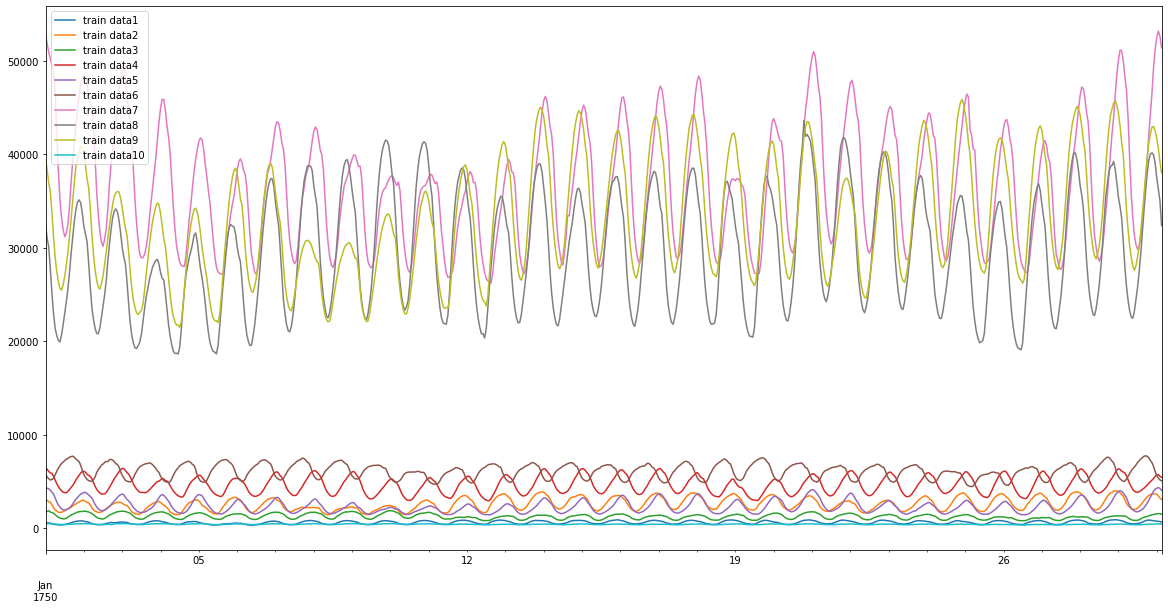

In [ ]:
top_ten_train = train_data[:10]

for i in range(len(top_ten_train)):
    #utils 이용해서 Series제작
    train = to_pandas(top_ten_train[i])
    train.plot(figsize=(20,10),label= f"train data{i+1}")
    plt.legend()

<h1>Modeling SimpleFeedForward</h1>

In [ ]:
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx import Trainer

mlp_estimator = DeepAREstimator(
    freq = dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length, 
    trainer=Trainer(epochs=15)
    
    )



mlp_predictor = mlp_estimator.train(dataset.train)


/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:343: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base = start.freq.base
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:386: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if self._full_range_date_features is not None
/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base is None or self._freq_base == start.freq.base
  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be remove

In [ ]:
from gluonts.evaluation import make_evaluation_predictions

mlp_forecast,mlp_ts = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=mlp_predictor,
    num_samples = 100
    #각 train data마다 몇개의 예측값을 봅을건지
)
mlp_forecast = list(mlp_forecast)
mlp_ts = list(mlp_ts)


/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base is None or self._freq_base == start.freq.base
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:386: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if self._full_range_date_features is not None


<h1>총 4227개의 timeseries, 각 timeseires 별로 100개를 예측</h1>

In [ ]:
len(mlp_forecast),mlp_forecast[0].samples.shape

(414, (100, 48))

<h1></h1>

<h1>1번째 time series 예측</h1>

In [ ]:
mlp_forecast[0].samples

array([[684.51685, 670.2827 , 647.29193, ..., 821.5961 , 774.10834,
        770.5845 ],
       [715.99835, 675.75104, 584.5801 , ..., 716.2563 , 783.0424 ,
        689.52264],
       [669.2375 , 584.0412 , 568.0799 , ..., 847.3468 , 740.5988 ,
        343.75943],
       ...,
       [713.6786 , 644.068  , 576.81366, ..., 527.9169 , 623.3621 ,
        599.903  ],
       [801.9839 , 705.17474, 665.21875, ..., 746.92194, 823.3802 ,
        695.3533 ],
       [746.9212 , 366.44272, 498.31488, ..., 731.4695 , 724.6438 ,
        550.5136 ]], dtype=float32)

In [ ]:
print(mlp_forecast[0].num_samples)
print(mlp_forecast[0].samples.shape)
print(mlp_forecast[0].start_date)
print(mlp_forecast[0].freq)


100
(100, 48)
1750-01-30 04:00:00
H


<h1>첫번째 timeseries 100개 예측값 평균</h1>

In [ ]:
mlp_forecast[0].mean

array([676.2131 , 646.11224, 634.7201 , 590.446  , 582.47504, 571.95483,
       566.74243, 565.0809 , 583.58154, 636.8646 , 680.6179 , 767.9241 ,
       804.67365, 886.55194, 934.786  , 945.5797 , 935.9031 , 935.75397,
       933.1005 , 856.7743 , 812.7472 , 777.3498 , 756.6878 , 696.6319 ,
       685.96674, 651.5675 , 605.0223 , 586.9388 , 581.5194 , 583.8141 ,
       564.4793 , 589.3809 , 600.06616, 625.3464 , 693.84357, 758.43304,
       800.5701 , 868.5185 , 930.97284, 911.55725, 924.87885, 893.1192 ,
       884.48975, 835.44305, 840.62604, 787.97705, 771.4899 , 714.31506],
      dtype=float32)

In [ ]:
mlp_forecast[0].quantile(0.5)

array([691.6943 , 635.3879 , 615.21643, 603.56854, 583.4946 , 567.339  ,
       569.41266, 584.1381 , 607.2968 , 634.48663, 698.31067, 735.12946,
       821.7375 , 891.0594 , 944.1216 , 947.97516, 945.9982 , 945.1443 ,
       931.27216, 853.64996, 818.39886, 795.04425, 751.19635, 717.5227 ,
       685.3859 , 651.8925 , 634.22253, 594.55286, 586.7182 , 585.3155 ,
       567.30817, 582.8058 , 604.8564 , 633.10986, 677.436  , 742.3966 ,
       807.0163 , 883.79114, 912.22046, 917.6522 , 912.40247, 887.3229 ,
       871.18994, 839.78546, 836.8112 , 798.72845, 767.793  , 716.15076],
      dtype=float32)

In [ ]:
mlp_ts[0][len(to_pandas(train_data[0])):].values.reshape(-1)

/usr/local/lib/python3.7/dist-packages/gluonts/dataset/util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


array([619., 565., 532., 495., 481., 467., 473., 488., 501., 534., 576.,
       639., 712., 772., 830., 880., 893., 896., 891., 854., 803., 769.,
       751., 701., 635., 572., 532., 493., 477., 468., 464., 477., 492.,
       519., 568., 624., 696., 761., 812., 836., 838., 829., 807., 785.,
       756., 719., 703., 659.], dtype=float32)

In [33]:
def plot_compare(testIndex):
    plt.figure(figsize=(20,8))
    plt.plot(mlp_ts[testIndex][len(to_pandas(train_data[testIndex])):].values.reshape(-1),label='y')
    plt.plot(mlp_forecast[testIndex].mean,label='forecast mean')
    plt.plot(mlp_forecast[testIndex].quantile(0.5),label='qunatile 0.5')
    plt.plot(mlp_forecast[testIndex].quantile(0.9),label='qunatile 0.5')
    plt.legend()

def plot_prob_forecasts(ts_entry, forecast_entry,i):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    ts_entry[i][-plot_length:].plot(ax=ax)
    #ts_entry[i].plot(ax=ax)  # plot the time series
    forecast_entry[i].plot(prediction_intervals=prediction_intervals, color='G')
    #plt.axvline(train_data[i]['target'].shape[0], color='r')
    plt.grid(which="both")
    
    plt.legend(legend, loc="upper left")
    plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/style.py:271: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  conv.to_rgba(color)
/usr/local/lib/python3.7/dist-packages/gluonts/model/forecast.py:232: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  **kwargs,
/usr/local/lib/python3.7/dist-packages/gluonts/model/forecast.py:232: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  **kwargs,


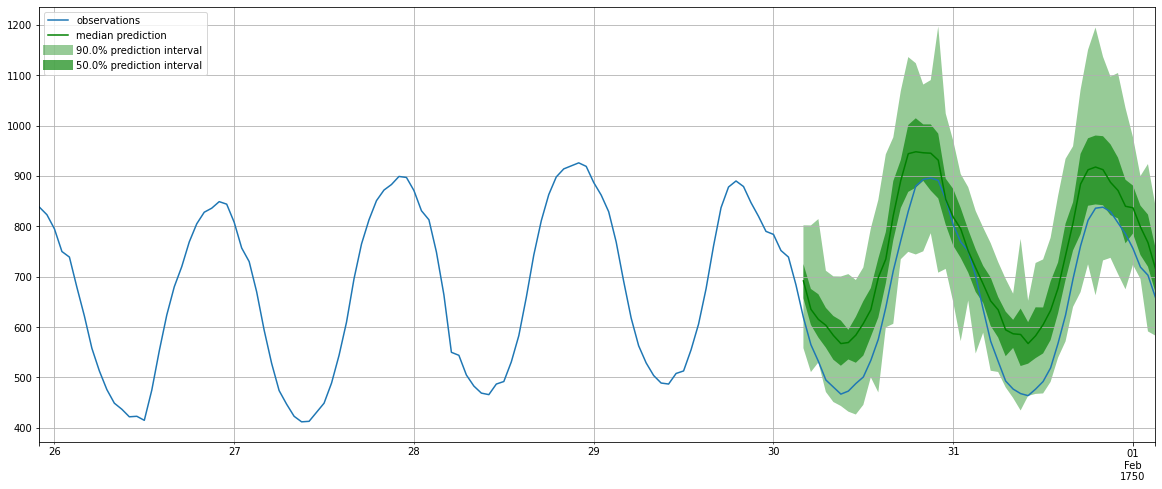

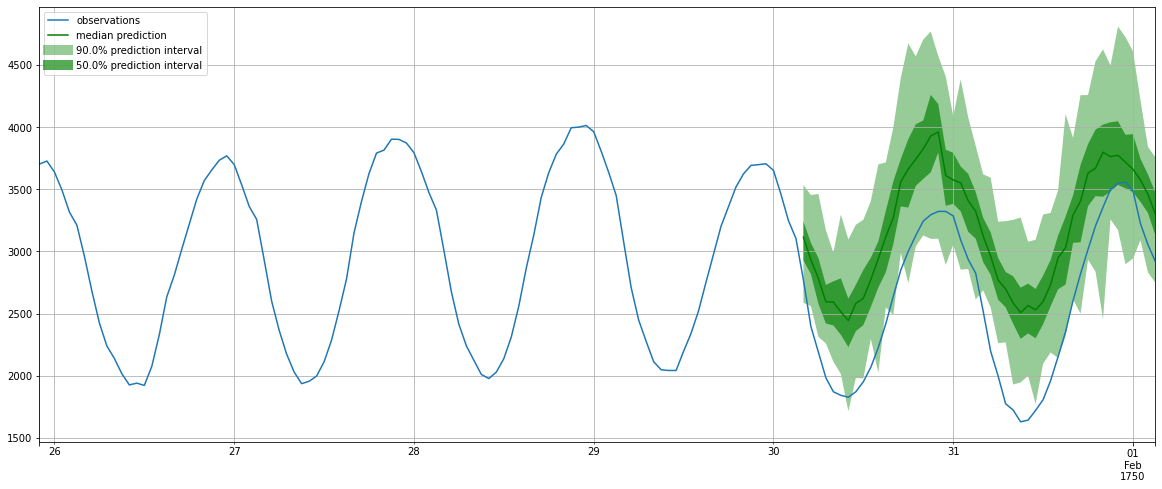

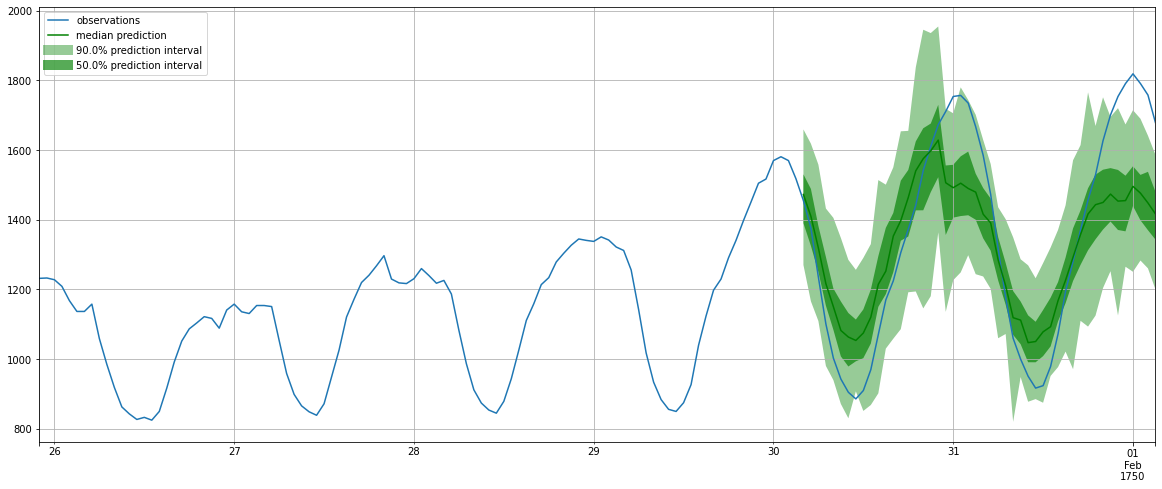

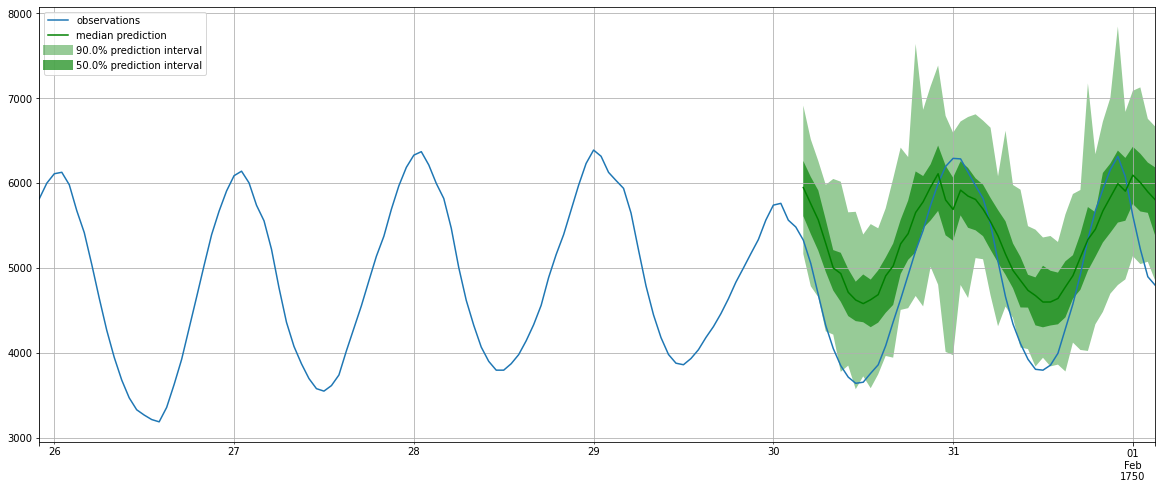

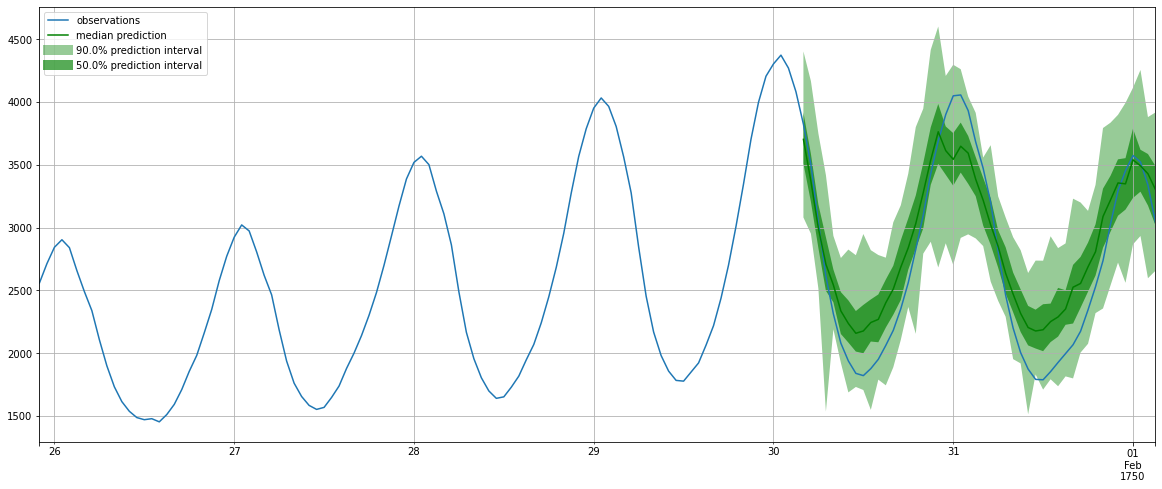

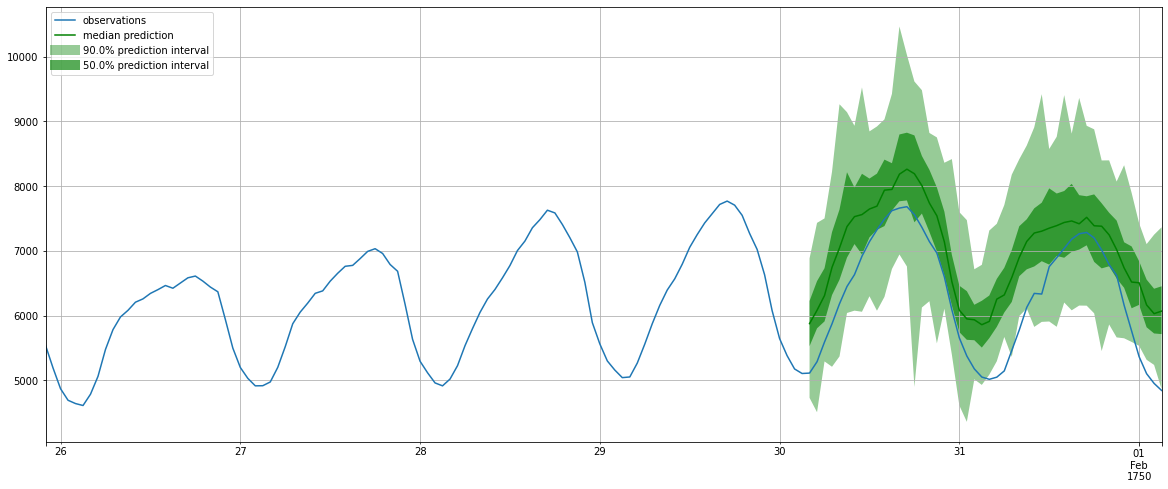

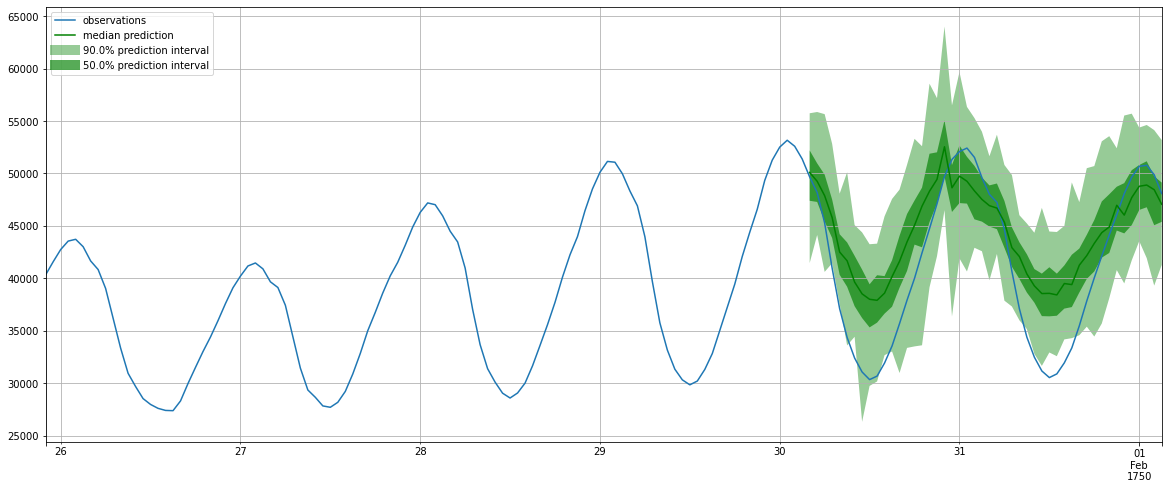

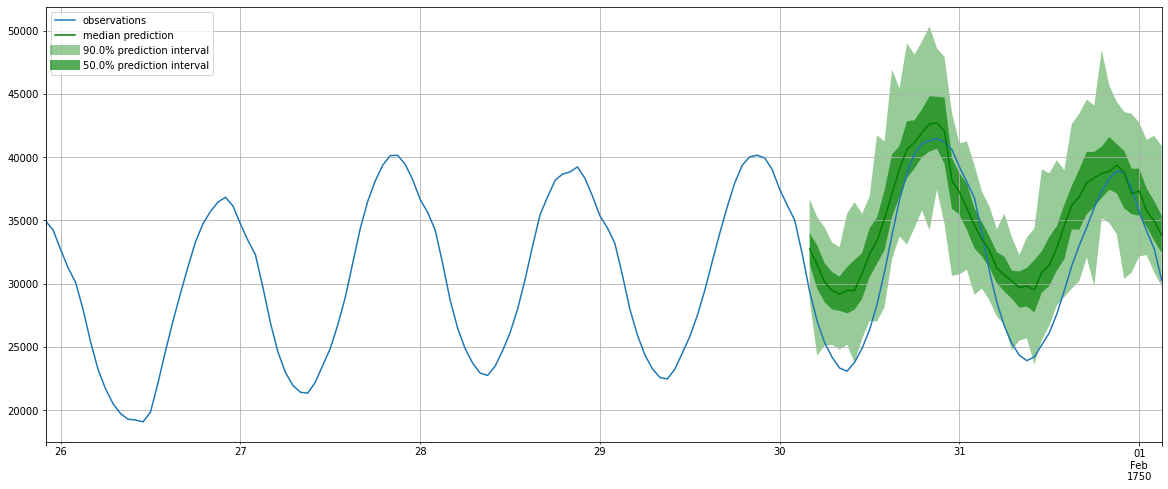

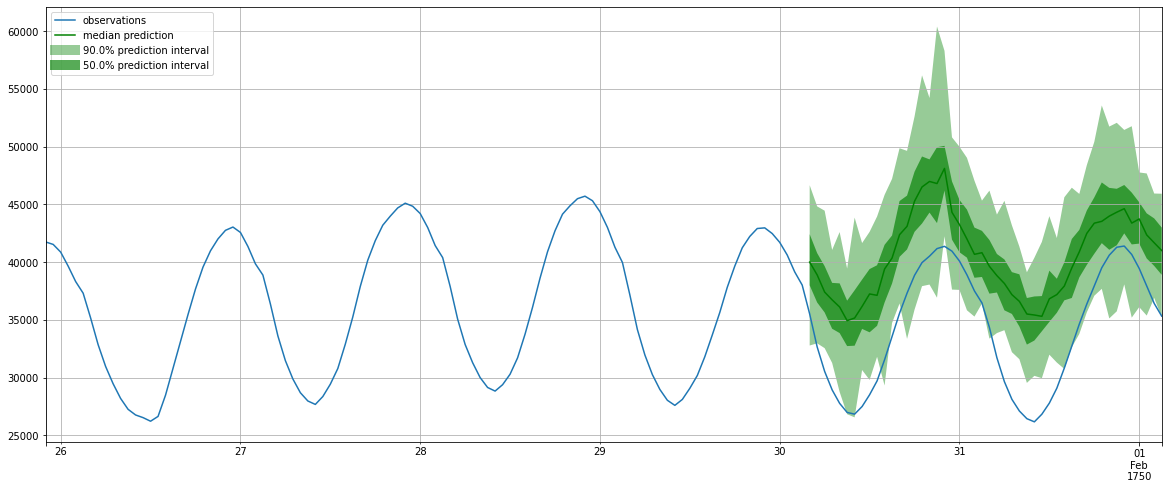

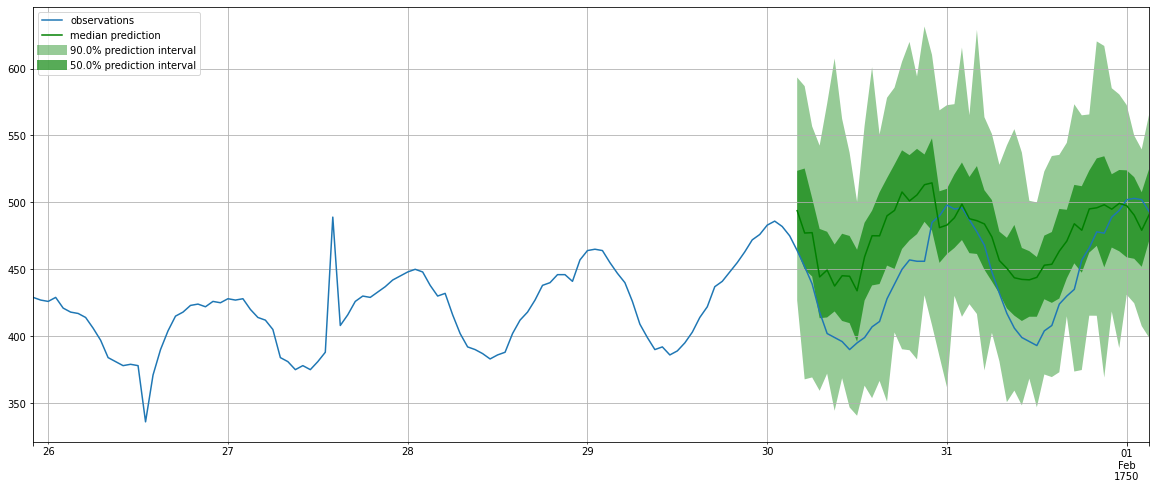

In [34]:
for i in range(10):
    plot_prob_forecasts(mlp_ts,mlp_forecast,i)

In [35]:
from gluonts.evaluation import Evaluator

In [36]:

mlp_forecast,mlp_ts = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=mlp_predictor,
    num_samples = 100
    #각 train data마다 몇개의 예측값을 봅을건지
)

evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(mlp_ts), iter(mlp_forecast), num_series=len(dataset.test))

Running evaluation:   0%|          | 0/414 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  self._freq_base is None or self._freq_base == start.freq.base
/usr/local/lib/python3.7/dist-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  return _shift_timestamp_helper(ts, ts.freq, offset)
/usr/local/lib/python3.7/dist-packages/gluonts/transform/feature.py:386: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  if self._full_range_date_features is not None
Running evaluation: 100%|██████████| 414/414 [00:42<00:00,  9.81it/s]/usr/local/lib/python3.7/dist-packages/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/usr/local/lib

In [37]:
print(json.dumps(agg_metrics, indent=4))

{
    "MSE": 68307602.50233772,
    "abs_error": 23919003.36693096,
    "abs_target_sum": 145558863.59960938,
    "abs_target_mean": 7324.822041043147,
    "seasonal_error": 336.9046924038302,
    "MASE": 3.280653352499986,
    "MAPE": 0.22305140080419342,
    "sMAPE": 0.16182502779671734,
    "MSIS": 58.11304045724164,
    "QuantileLoss[0.1]": 14112197.712402342,
    "Coverage[0.1]": 0.1925322061191627,
    "QuantileLoss[0.5]": 23919003.690375328,
    "Coverage[0.5]": 0.7159319645732692,
    "QuantileLoss[0.9]": 8839849.544122888,
    "Coverage[0.9]": 0.9180253623188401,
    "RMSE": 8264.841347681015,
    "NRMSE": 1.1283333985959878,
    "ND": 0.16432529614084698,
    "wQuantileLoss[0.1]": 0.09695182665908236,
    "wQuantileLoss[0.5]": 0.16432529836293333,
    "wQuantileLoss[0.9]": 0.06073041053988148,
    "mean_absolute_QuantileLoss": 15623683.648966854,
    "mean_wQuantileLoss": 0.10733584518729906,
    "MAE_Coverage": 0.10882984433709068,
    "OWA": NaN
}
